In [1]:
import gzip
import pandas as pd 

accept = pd.read_csv('accepted_2007_to_2018Q4.csv.gz')
reject = pd.read_csv('rejected_2007_to_2018Q4.csv.gz')

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Data Inspection

In [2]:
accept.shape, reject.shape

((2260701, 151), (27648741, 9))

In [3]:
accept.columns, reject.columns

(Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
        'term', 'int_rate', 'installment', 'grade', 'sub_grade',
        ...
        'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
        'disbursement_method', 'debt_settlement_flag',
        'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
        'settlement_amount', 'settlement_percentage', 'settlement_term'],
       dtype='object', length=151),
 Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
        'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
        'Policy Code'],
       dtype='object'))

In [4]:
accept.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
accept.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [6]:
reject.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [7]:
# #Understand risk score's influence on reject data 
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.histplot(reject['Risk_Score'], stat = 'percent')
# plt.title('Risk score distribution for rejected data')

## Data Cleaning
### Choice of variables

In order to use both reject and accept data, I only choose the columns that exists in both dataset. The table below is the columns that have been chosen. 

| Accept data | Reject data| Column Description  |
|---|---|---|
|loan_amnt| Amount Requested	  |  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. |
| title | Loan Title | The loan title provided by the borrower |
| dti |Debt-To-Income Ratio | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.  |  
| addr_state |State |  The state provided by the borrower in the loan application  |
|  emp_length|Employment Length |  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. |
| policy_code | Policy Code|"products publicly available policy_code=1, new products not publicly available policy_code=2"|


In [8]:
#Create the dataframe for modeling 
accept_cols = ['loan_amnt','title', 'dti','addr_state','emp_length', 'policy_code' ]
accept_df = accept.loc[:, accept_cols]
accept_df.head()

,loan_amnt,title,dti,addr_state,emp_length,policy_code
0,3600.0,Debt consolidation,5.91,PA,10+ years,1.0
1,24700.0,Business,16.06,SD,10+ years,1.0
2,20000.0,NaN,10.78,IL,10+ years,1.0
3,35000.0,Debt consolidation,17.06,NJ,10+ years,1.0
4,10400.0,Major purchase,25.37,PA,3 years,1.0


In [9]:
reject_df = reject.drop(columns = ['Application Date', 'Zip Code', 'Risk_Score'])
reject_df.head()

,Amount Requested,Loan Title,Debt-To-Income Ratio,State,Employment Length,Policy Code
0,1000.0,Wedding Covered but No Honeymoon,10%,NM,4 years,0.0
1,1000.0,Consolidating Debt,10%,MA,< 1 year,0.0
2,11000.0,Want to consolidate my debt,10%,MD,1 year,0.0
3,6000.0,waksman,38.64%,MA,< 1 year,0.0
4,1500.0,mdrigo,9.43%,MD,< 1 year,0.0


In [10]:
#Encode accept and reject status in the data 
reject_df['pass'] = 0
accept_df['pass'] = 1


#concact two data together
reject_df.columns = list(accept_df)
df = pd.concat([accept_df,reject_df])
print(df.shape)
df.head()

(29909442, 7)


,loan_amnt,title,dti,addr_state,emp_length,policy_code,pass
0,3600.0,Debt consolidation,5.91,PA,10+ years,1.0,1
1,24700.0,Business,16.06,SD,10+ years,1.0,1
2,20000.0,NaN,10.78,IL,10+ years,1.0,1
3,35000.0,Debt consolidation,17.06,NJ,10+ years,1.0,1
4,10400.0,Major purchase,25.37,PA,3 years,1.0,1


In [11]:
#columns that contain nan in df
df.isnull().sum()

# drop rows that contain NA
df.dropna(inplace=True)

In [12]:
#Check dataframe types
print(df.dtypes)

#convert strings to numerical values 
df['dti'] = df['dti'].astype(str).str.extract('(\d+)').astype(float)
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(int)

#deep copy 
df_copy = df.copy()

loan_amnt      float64
title           object
dti             object
addr_state      object
emp_length      object
policy_code    float64
pass             int64
dtype: object


Note: `'(\d+)' `This is a Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at least (one or more) since they are enclosed in a ( ) that means the group that you want to capture. 
- `\d+`: 1, 12, 123

In [13]:
#understand 'policy_code' 
print(df['policy_code'].value_counts())

0.0    26613303
1.0     2093538
2.0       81939
Name: policy_code, dtype: int64


policy_code variable contains lots of 0. Since there isn't an explanation of it, we will drop when it is 0. 

In [14]:
df = df[df['policy_code'] !=0]

## Exploratory Data Analysis

In [15]:
#stats for all columns 
df.describe()

,loan_amnt,dti,emp_length,policy_code,pass
count,2.175477e+06,2.175477e+06,2.175477e+06,2.175477e+06,2.175477e+06
mean,1.557046e+04,1.837936e+01,5.971460e+00,1.037665e+00,9.623352e-01
std,1.201160e+04,1.472063e+01,3.596680e+00,1.903844e-01,1.903844e-01
min,5.000000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.000000e+03,1.100000e+01,2.000000e+00,1.000000e+00,1.000000e+00
50%,1.302500e+04,1.700000e+01,6.000000e+00,1.000000e+00,1.000000e+00
75%,2.000000e+04,2.400000e+01,1.000000e+01,1.000000e+00,1.000000e+00
max,6.000000e+05,9.999000e+03,1.000000e+01,2.000000e+00,1.000000e+00


Text(0.5, 1.0, 'Box plot for loan amount')

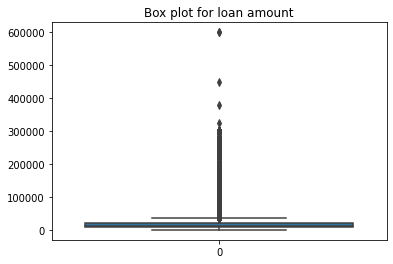

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df['loan_amnt'])
plt.title('Box plot for loan amount')

In [17]:
#outliers in loan amout
df.loc[df['loan_amnt'] >400000]

,loan_amnt,title,dti,addr_state,emp_length,policy_code,pass
9604094,600000.0,Business Loan,1.0,CA,1,2.0,0
9618307,600000.0,Business Loan,1.0,MN,1,2.0,0
21915082,450000.0,Business Loan,1.0,MA,1,2.0,0


Text(0.5, 1.0, 'Box plot for loan amount(outlier deleted)')

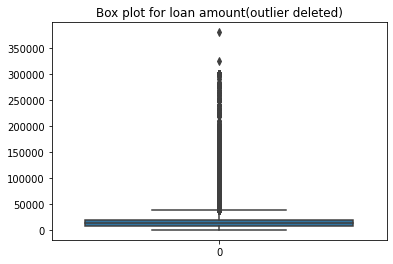

In [18]:
#Delete outlier 
df  = df.loc[df['loan_amnt'] <=400000]
sns.boxplot(data=df['loan_amnt'])
plt.title('Box plot for loan amount(outlier deleted)')

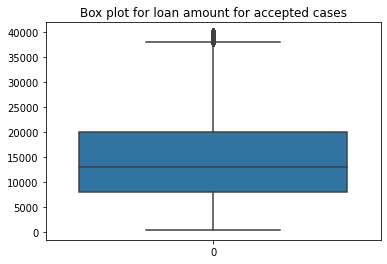

In [19]:
accept_loan_amt =  df.loc[df['pass'] == 1]
reject_loan_amt =  df.loc[df['pass'] == 0]
sns.boxplot(data=accept_loan_amt['loan_amnt'])
plt.title('Box plot for loan amount for accepted cases')
plt.show()

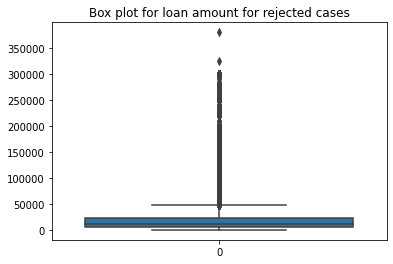

In [20]:
sns.boxplot(data= reject_loan_amt['loan_amnt'].values)
plt.title('Box plot for loan amount for rejected cases')
plt.show()

In [21]:
#stats specifically for categorical columns 
df.describe(include = ['O'])

,title,addr_state
count,2175474,2175474
unique,60962,51
top,Debt consolidation,CA
freq,1107332,305414


Text(0.5, 1.0, 'Count for accepted(=1) and rejected(=0) loan request ')

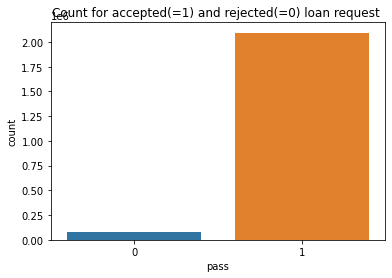

In [22]:
#Percentage of pass vs not pass 
sns.countplot(x="pass", data=df)
plt.title('Count for accepted(=1) and rejected(=0) loan request ')

In [23]:
#Understand the variable, title 
df['title'].value_counts()

Debt consolidation             1107332
Credit card refinancing         460527
Home improvement                129089
Other                           119946
Major purchase                   42990
                                ...   
Debt Consolidation loan.             1
EASYDAY                              1
Dodge                                1
Credit Card Refineance               1
Business assets acquisition          1
Name: title, Length: 60962, dtype: int64

Text(0.5, 1.0, 'Count for state loaners live')

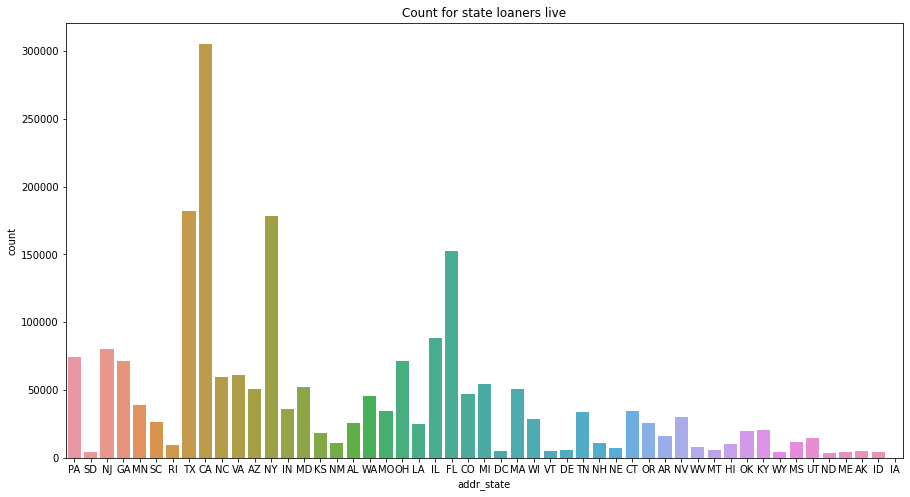

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(x="addr_state", data=df)
plt.title('Count for state loaners live')

### Some obeservation 
- Most requests in our data frame are accepted, which might bias our classification model. 
- Most loaners live in CA, T, NY, or FL. 
- From the boxplot, we can see more variance in loan amount exist the rejected loan, and rejected loan has much more outlier in comparison to accepted loan. Since we have much more accpeted loan, we will decide not to delete the outliers from rejected loan amount to so the data won't be even more unblanaced. 

## Feature engineering

### Encode cateogrical data 

#### Others: encoder understanding
Label encoder only turns the data into a list of ordinal values e.g.[1112213] while one hot encoder will change it into multiple dummy variables e.g. [[010][001][100]]
To perform the encoding, we will needs to reshape the data. 

#### to reshape the data
``` 
import numpy as np
cat = np.array(["cold","hot","warm"]).reshape(1,3) #format for onehotencoding 
cat_wrong = np.array(["cold","hot","warm"]) #wrong format
cat.shape, cat_wrong.shape
```

#### label encoder 
```
le = LabelEncoder()
X_type = le.fit_transform(X['type'])
print(X_type)
```

#### onehot encoder 
We will need to reshape the categorical column, one hot encode, make it a dataframe so we can piece it we are original dataset. 
```
ohe = OneHotEncoder()
X_type = np.array(X['type']).reshape(-1, 1)

X_type = pd.DataFrame(ohe.fit_transform(X_type).toarray(), columns=['Link', 'Photo', 'Status', 'Video'])
X_type
```
#### Problem of One-Hot Encoding: Dummy Variable Trap
- Dummy Variable Trap is a scenario in which variables are highly correlated to each other.
- multicollinearity: Multicollinearity occurs where there is a dependency between the independent features. 

#### When to use one hot encoding or label encoding? 

We apply One-Hot Encoding when:

- The categorical feature is not ordinal (like countries)
- The number of categorical features is less so one-hot encoding can be effectively applied

We apply Label Encoding when:

- The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
- The number of categories is quite large as one-hot encoding can lead to high memory consumption


#### Conclusion for our dataset 
Since states and title aren't ordinal data, we will use one hot encoder to process our categorical data. 

In [25]:
#one-hot encoding for addr_state variable  

from sklearn.preprocessing import OneHotEncoder
import numpy as np 


addr_state = df['addr_state']
ohe = OneHotEncoder()
addr_state = np.array(addr_state).reshape(-1, 1)

addr_state = pd.DataFrame(ohe.fit_transform(addr_state).toarray(), columns=ohe.categories_, index=df.index)
addr_state


,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27637988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27638313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27639468,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27640181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#flatten multi-index
addr_state.columns = addr_state.columns.get_level_values(0)
addr_state.columns

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object')

In [27]:
# One hot encode policy_code

policy_code = df['policy_code']
ohe = OneHotEncoder()
policy_code = np.array(policy_code).reshape(-1, 1)

policy_code = pd.DataFrame(ohe.fit_transform(policy_code).toarray(), columns= ['policy_1', 'policy_2'], index=df.index)
policy_code

#flatten multi-index
policy_code.columns = policy_code.columns.get_level_values(0)
policy_code.columns

Index(['policy_1', 'policy_2'], dtype='object')

In [28]:
#Concat two data together 
full_df = pd.concat([df,addr_state, policy_code], axis = 1)
full_df.drop(columns= ['addr_state', 'policy_code'], inplace = True)

In [29]:
full_df.head()

,loan_amnt,title,dti,emp_length,pass,AK,AL,AR,AZ,CA,...,TX,UT,VA,VT,WA,WI,WV,WY,policy_1,policy_2
0,3600.0,Debt consolidation,5.0,10,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,24700.0,Business,16.0,10,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,35000.0,Debt consolidation,17.0,10,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10400.0,Major purchase,25.0,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,11950.0,Debt consolidation,10.0,4,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Balancing the target variable -- pass

From the bar plot, we can see much more accepted cases in the dataset. We want to create a more balanced dataset to imporve the prediction, so we random sample the the same number of rejected cases for the accepted cases. 

In [30]:
reject_count = len(full_df[full_df['pass']==0])
accept_count = len(full_df[full_df['pass']==1])
print('total count of rejected cases', reject_count)
print('total count of accepted cases', accept_count)

accept_samples = full_df[full_df['pass']==1].sample(n= reject_count, replace=True, random_state=1)
print('total count of the accepted samples', len(accept_samples))


full_df = pd.concat([accept_samples,full_df[full_df['pass']==0]])
print('total count of the balanced dataset', len(full_df))

total count of rejected cases 81936
total count of accepted cases 2093538
total count of the accepted samples 81936
total count of the balanced dataset 163872


In [31]:
print('total count of rejected cases', len(full_df[full_df['pass']==0]))
print('total count of accepted cases', len(full_df[full_df['pass']==1]))

total count of rejected cases 81936
total count of accepted cases 81936


## Modeling & Evaluation

In [32]:
X = full_df.drop(columns= ['pass', 'title'])
y = full_df['pass']

#### Split the training and testing data

In [33]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(122904, 56) (40968, 56) (122904,) (40968,)


In [34]:
y_train.value_counts()

0    61465
1    61439
Name: pass, dtype: int64

In [35]:
#Use LogisticRegressionCV becuase it allows cross validation 
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
#logistic regression model 
result = model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20471
           1       1.00      1.00      1.00     20497

    accuracy                           1.00     40968
   macro avg       1.00      1.00      1.00     40968
weighted avg       1.00      1.00      1.00     40968



In [37]:
coeff_parameter = pd.DataFrame(np.array(model.coef_).reshape(-1,1), X_train.columns,columns=['Coefficient'])
coeff_parameter.loc['intercept', :] = model.intercept_
coeff_parameter

,Coefficient
loan_amnt,-0.000010
dti,-0.005435
emp_length,0.043533
AK,0.001765
AL,-0.000351
AR,0.000839
AZ,-0.005295
CA,0.002608
CO,0.001753
CT,0.018115


### Interpret the coefs in logsitic model 

logit(p) = a+ bX₁ + cX₂ ( Equation ** )

logit(p) is log(p/1-p), indicating the log-odds ratio. We can say that 1 unit increase in X₁ will result in b increase in logit(p). Therefore we want to maximize logit(p) to find the highest amount of loan we can rent. 

### Some observations
- add_state: For the state address, since one person can only have one state address, and NY have the highest positive ceofficient, 0.017 for state address, we will assign NY to a person to get the highest loan as possible. 
- dti: As expected, depth to income ratio is -0.005, showcasing that it has a negative effect on amount of loan you can borrow. 
- emp_length: The longer the emp_length, the more loan you can borrow, which is also within expectation. 
- loan_amnt: It is really small, -0.00001, but it still has a negative effect, which is also plausible. 
- policy_code: We can see that policy_1, borrowing a products publicly available, is around 7.005, which is much better than policy_2, borrowing a products that isn't publicly available. Therefore, we should also assign policy_1 = 1, policy_2 = 0. 


### Hypothesize to find the highest loan
To find the highest loan, we will assign values to the variables below, 
- NY = 1, other state address code = 0 
- policy_1 = 1, policy_2 = 0
- emp_length: 45. We assume on average, a person will start working at 20, and retire at 65 if he/she doesn't change a compay. The max emp_length is 45 years. 
- dti: 0. We assume that person never has a depth yet. 


In [52]:
fill = [0 for _ in range(len(X_train.columns)-3)]
fill
#randomly set default loan as 100000
best_person = [100000, 0, 25]+ fill 

#Put NY as 1
best_person[37] = 1
best_person = np.array(best_person).reshape(1,-1)
predictions = model.predict(best_person)
predictions

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


array([1])

### Use a step wise function to calculate the highest amount of loan one can borrow 

In [53]:

def step_wise(best_person, model): 
    prediction = 1
    for _ in range(1000): 
        best_person[0][0] += 1000
        prediction = model.predict(best_person)
        if prediction != 1:
            break 
        
    return best_person[0][0]

step_wise(best_person, model)


/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV wa

118000

We can run the stepwise function in a more granular level, but it consume more computational power. For now, I use 1000 as a step, and find that the highest amount of loan a person can receive is around 118000. 